# Geolocation Data

Geospatial information is data that is referenced by spatial or geographic coordinates. The data that we will be working with in this lesson is vector data - features that are represented by points, lines, and polygons. <br>
 - **Points** are defined by a pair of (x,y) coordinates. They usually represent locations, place names, and other objects on the ground.
 - **Lines** are the connection between two points. They can have properties such as length, direction, flow, etc.
 - **Polygons** are a series of lines connected together to form a shape. They can have properties such as area, perimeters, and centroids. 
 
In this notebook, you will need to install the [geopandas](https://anaconda.org/conda-forge/geopandas) and [geoPy](https://anaconda.org/conda-forge/geopy) libraries. Also, download [this text file](https://automating-gis-processes.github.io/CSC18/_static/data/L3/addresses.txt) to use in the example code below.

In [1]:
import pandas as pd
import geopandas as gpd #used for transforming geolocation data
import matplotlib.pyplot as plt

from datetime import datetime  #to convert data to datetime that does not fall within the pandas.to_datetime function timeframe
from shapely.geometry import Point  #transform latitude/longitude to geo-coordinate data
from geopandas.tools import geocode #get the latitude/longitude for a given address
from geopandas.tools import reverse_geocode  #get the address for a location using latitude/longitude

%matplotlib inline

### Geocoding and Reverse Geocoding

Geocoding is taking an address for a location and returning its latitudinal and longitudinal coordinates. Reverse geocoding would then be the opposite - taking the latitudinal and longitudinal coordinates for a location and returning the physical address.

In [2]:
#take an address and return coordinates
#returned variable is a geo-dataframe with 2 columns, geometry (the geographical shape) and the full physical address
ex1_geo = geocode("12 South Summit Avenue, Gaithersburg, MD", provider='nominatim')
ex1_geo

C:\ProgramData\Anaconda3\lib\site-packages\geopy\geocoders\osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


,geometry,address
0,POINT (-77.19392100403969 39.14089855),"12, South Summit Avenue, Gaithersburg, Montgom..."


In [3]:
#structure of full address
#each API structures addresses differently
ex1_geo['address'].iloc[0]

'12, South Summit Avenue, Gaithersburg, Montgomery County, Maryland, 20877, USA'

In [4]:
#use latitude and longitude to get physical address
#pass through using Point geometry
#also returns geo-dataframe with geometry and full physical address
ex2_geo = reverse_geocode([Point(-77.15879730243169, 39.0985195)], provider='nominatim')
ex2_geo

,geometry,address
0,POINT (-77.15879730243169 39.0985195),"Montgomery College, 51, Mannakee Street, Westm..."


### Hurricane Mitchell Meteorite Landings

At the end of your notebook for the NASA Meteorite data exercise, add a new cell with the code `df.to_csv("datasets/NASAmeteorite.csv")`. Run that cell to create a csv file of your meteorite data to use in the following examples. Then [download the `continents.json` GeoJSON file](https://notebooks.azure.com/priesterkc/projects/DABmaterial/tree/Lv2%20Data%20Analytics) for the world map that will be charted.

In [9]:
#load meteorite data collected from NASA Open Data API
meteor_df = pd.read_csv("datasets_hurricaneMichael.csv")
meteor_df.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,10/06/2018 17:00,18.0,86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven
1,1A,10/06/2018 20:00,18.3,86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila
2,2,10/06/2018 23:00,18.8,86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila
3,2A,10/07/2018 02:00,18.4,87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg
4,3,10/07/2018 05:00,18.6,86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg


In [10]:
#data type of each column
meteor_df.dtypes

AdvisoryNumber     object
Date               object
Lat               float64
Long              float64
Wind                int64
Pres                int64
Movement           object
Type               object
Name               object
Received           object
Forecaster         object
dtype: object

In [11]:
#only dataframe with non-null year column values
meteor_df = meteor_df.loc[meteor_df['Date'].notnull()]

#change year column into a string
#need to use string type for getYear function below
meteor_df['Date'] = meteor_df['Date'].astype(str)

In [12]:
#function to split apart the date from the timestamp
def getYear(col):
    #get YYYY-MM-DD value
    date = col.split("T")[0]
    
    #extract year from date
    dt = datetime.strptime(date, '%Y-%m-%d')
    return dt.year

In [13]:
#see columns with null values
meteor_df.count()

AdvisoryNumber    45
Date              45
Lat               45
Long              45
Wind              45
Pres              45
Movement          45
Type              45
Name              45
Received          45
Forecaster        45
dtype: int64

In [29]:
meteor_df ['Long'] = 0 - meteor_df ['Long']

In [45]:
#make a new column to hold the longitude & latitude as a list
meteor_df['coordinates'] = list(meteor_df[['Long', 'Lat']].values)

In [46]:
#see new coordinates column
meteor_df.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,coordinates
0,1,10/06/2018 17:00,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven,"[-86.6, 18.0]"
1,1A,10/06/2018 20:00,18.3,-86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila,"[-86.6, 18.3]"
2,2,10/06/2018 23:00,18.8,-86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila,"[-86.6, 18.8]"
3,2A,10/07/2018 02:00,18.4,-87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg,"[-87.1, 18.4]"
4,3,10/07/2018 05:00,18.6,-86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg,"[-86.9, 18.6]"


In [47]:
#list values in coordinates column is classified as object type
meteor_df['coordinates'].dtypes

dtype('O')

In [48]:
#convert the coordinates to a geolocation type
meteor_df['coordinates'] = meteor_df['coordinates'].apply(Point)

In [49]:
#coordinates column now has POINT next to each coordinate pair value
meteor_df.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,coordinates
0,1,10/06/2018 17:00,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven,POINT (-86.59999999999999 18)
1,1A,10/06/2018 20:00,18.3,-86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila,POINT (-86.59999999999999 18.3)
2,2,10/06/2018 23:00,18.8,-86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila,POINT (-86.59999999999999 18.8)
3,2A,10/07/2018 02:00,18.4,-87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg,POINT (-87.09999999999999 18.4)
4,3,10/07/2018 05:00,18.6,-86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg,POINT (-86.90000000000001 18.6)


In [50]:
#coordinates column with geolocation data is just a regular pandas Series type
type(meteor_df['coordinates'])

pandas.core.series.Series

In [51]:
#create a geolocation dataframe type using the coordinates column as the geolocation data
geo_meteor = gpd.GeoDataFrame(meteor_df, geometry='coordinates')

In [52]:
#geo-dataframe looks the same as regular dataframe
geo_meteor.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,coordinates
0,1,10/06/2018 17:00,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven,POINT (-86.59999999999999 18)
1,1A,10/06/2018 20:00,18.3,-86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila,POINT (-86.59999999999999 18.3)
2,2,10/06/2018 23:00,18.8,-86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila,POINT (-86.59999999999999 18.8)
3,2A,10/07/2018 02:00,18.4,-87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg,POINT (-87.09999999999999 18.4)
4,3,10/07/2018 05:00,18.6,-86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg,POINT (-86.90000000000001 18.6)


In [53]:
#verify coordinates column is geolocation data type
type(geo_meteor['coordinates'])

geopandas.geoseries.GeoSeries

In [54]:
#import file that contains a world map shape polygons
#will use to plot the coordinates of meteorite landings
filepath = "datasets_US_states(5m).json"

#data contains polygon shape coordinates for different map body types (continents, etc.)
map_df = gpd.read_file(filepath)
map_df.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"(POLYGON ((-88.124658 30.28364, -88.0868119999..."
1,0400000US02,02,Alaska,,570640.950,"(POLYGON ((-166.10574 53.988606, -166.075283 5..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.538593 37.000674, -112.534545 3..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.042964 33.019219, -94.043036 33...."
4,0400000US06,06,California,,155779.220,"(POLYGON ((-122.421439 37.869969, -122.421341 ..."


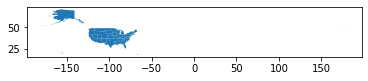

In [55]:
#map graph
map_df.plot()

In [56]:
map48 = map_df.loc[map_df['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico']) == False]

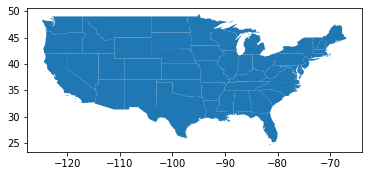

In [57]:
map48.plot()

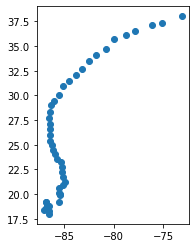

In [58]:
#plot the coordinates (no map)
geo_meteor.plot()

Text(0.5, 1, 'Hurricane Mitchell Path')

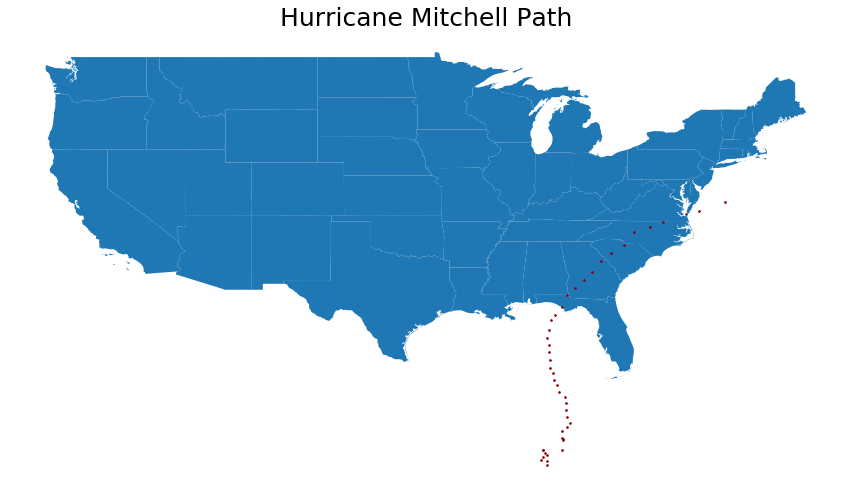

In [59]:
#plot coordinates on top of map graph

#this is to set the size of the borders
fig, ax = plt.subplots(1, figsize=(15,10))

#this is the map
basemap = map48.plot(ax=ax)

#plot coordinates on top of map graph
geo_meteor.plot(ax=basemap, color='darkred', marker=".", markersize=10)

#take off axis numbers
ax.axis('off')

#put title on map
ax.set_title("Hurricane Mitchell Path", fontsize=25, fontweight=3)